Библиотеки

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for test
import sklearn 
from pylab import rcParams


#для отображения всех данных из pd (без ...)
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Загрузка данных

In [2]:
START_DATA = pd.read_csv ('half_dataset.zip', header=[0, 1])

Просто смотрю на формат данных

In [29]:
START_DATA.shape
START_DATA.columns
#START_DATA.tail()
#print(START_DATA.dtypes)

MultiIndex([( 'Unnamed: 0_level_0',   'Unnamed: 0_level_1'),
            (   'timestamp_second',   'Unnamed: 0_level_1'),
            (        'bid_price_0',              'nunique'),
            (        'bid_price_0',                 'mean'),
            (        'bid_price_0',               'median'),
            (        'bid_price_0',                  'std'),
            (        'bid_price_0',                  'min'),
            (        'bid_price_0',                  'max'),
            (        'bid_price_0',                'first'),
            (        'bid_price_0',                 'last'),
            ...
            ('sell_trade_quantity',                  'sum'),
            ('sell_trade_quantity',                 'mean'),
            ('sell_trade_quantity',               'median'),
            ('sell_trade_quantity',                  'std'),
            ('sell_trade_quantity',                  'min'),
            ('sell_trade_quantity',                  'max'),
        

In [4]:
#basic_data = START_DATA.bid_price_0["mean"].dropna()

In [5]:
START_DATA.bid_price_0["mean"].head()

0    44.183379
1    44.190000
2    44.187467
3    44.181038
4    44.213095
Name: mean, dtype: float64

Строю графики для bid, ask

<AxesSubplot:title={'center':'BID_0'}, ylabel='Цена, $'>

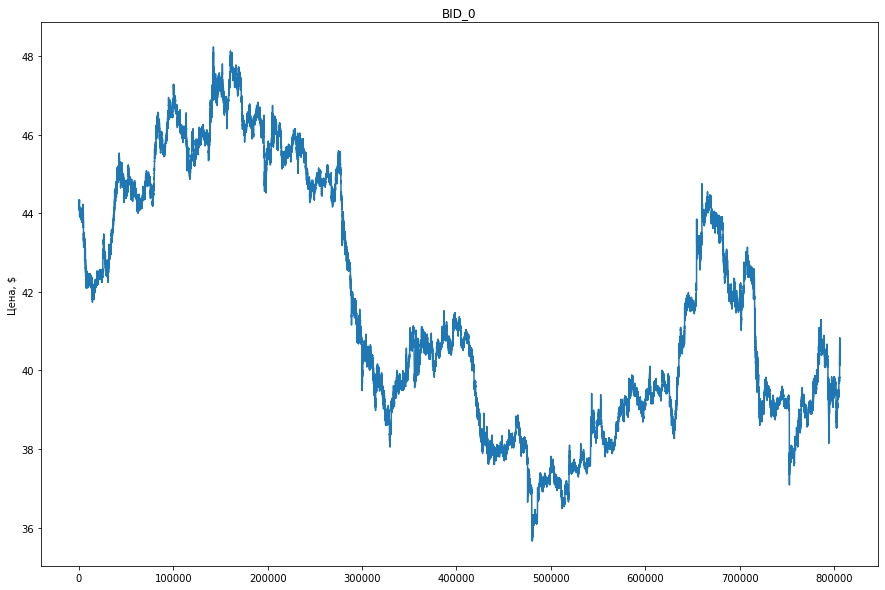

In [6]:
START_DATA.bid_price_0["mean"].plot(title = 'BID_0', xlabel = '', ylabel = 'Цена, $', figsize = (15, 10))

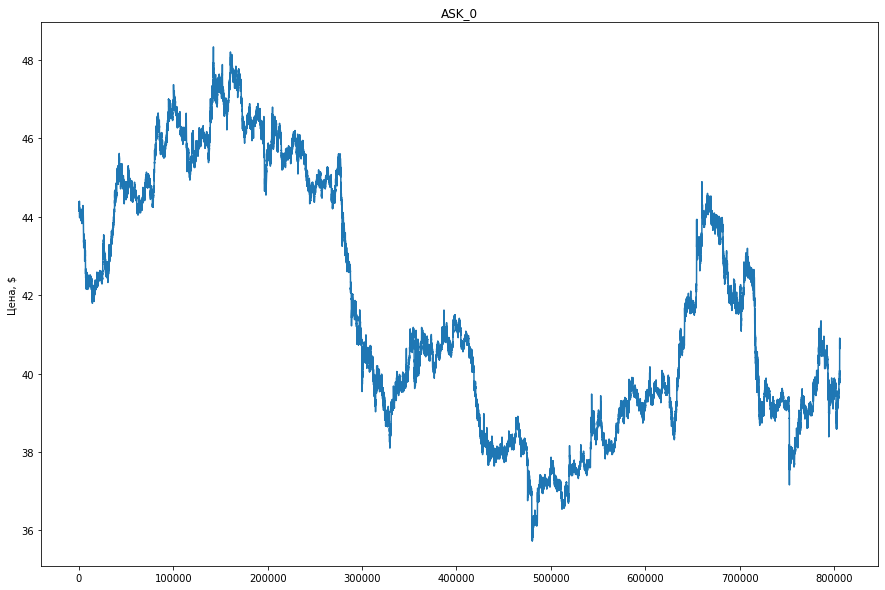

In [7]:
plt = START_DATA.ask_price_0["mean"].plot(title = 'ASK_0', xlabel = '', ylabel = 'Цена, $', figsize = (15, 10))

<AxesSubplot:ylabel='Цена, $'>

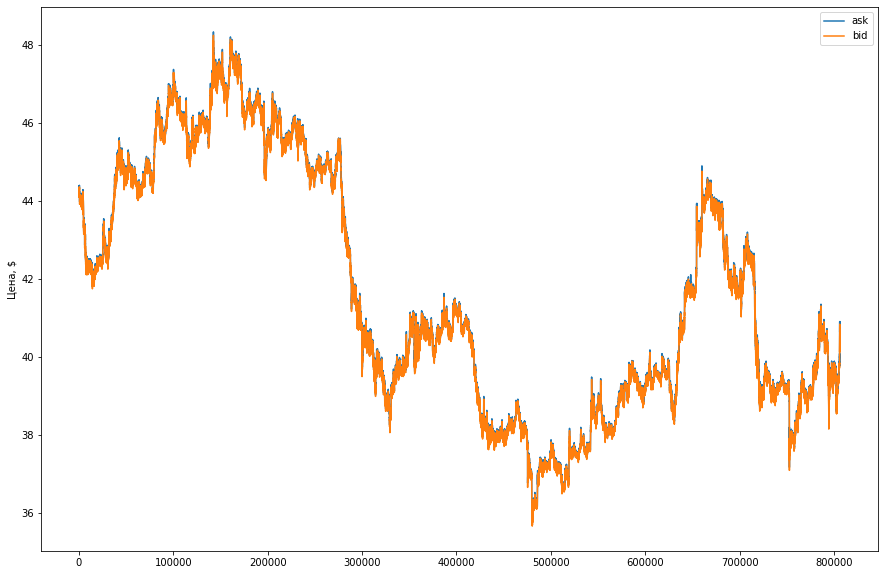

In [8]:
Ask_Bid_Graphs = pd.DataFrame(index = START_DATA.index)
Ask_Bid_Graphs['ask'] = START_DATA.ask_price_0["mean"]
Ask_Bid_Graphs['bid'] = START_DATA.bid_price_0["mean"]
Ask_Bid_Graphs.plot(ylabel = 'Цена, $', figsize = (15, 10))


Начало разработки моделей предсказания

Беру только нужные для предсказания поля из всех данных

In [149]:
Bid_mean_DataFrame = pd.DataFrame(data = {'mean_bid': START_DATA.bid_price_0["mean"], 'seconds':START_DATA.timestamp_second['Unnamed: 0_level_1']} )
Bid_mean_DataFrame = Bid_mean_DataFrame.set_index('seconds')
Bid_mean_DataFrame.tail

<bound method NDFrame.tail of           mean_bid
seconds           
0        44.183379
1        44.190000
2        44.187467
3        44.181038
4        44.213095
...            ...
805991   40.635062
805992   40.634050
805993   40.630763
805994   40.619000
805995   40.625260

[805996 rows x 1 columns]>

Разделяю данные на тренировочные и тестовы

In [151]:
length_of_train = len(Bid_mean_DataFrame) - 60 
train_data = Bid_mean_DataFrame[0:length_of_train] 
test_data = Bid_mean_DataFrame[length_of_train:]

Наивная модель

In [152]:
Naive_method_data = test_data.copy()
Naive_method_data['naive_forecast'] = train_data['mean_bid'][length_of_train-1]


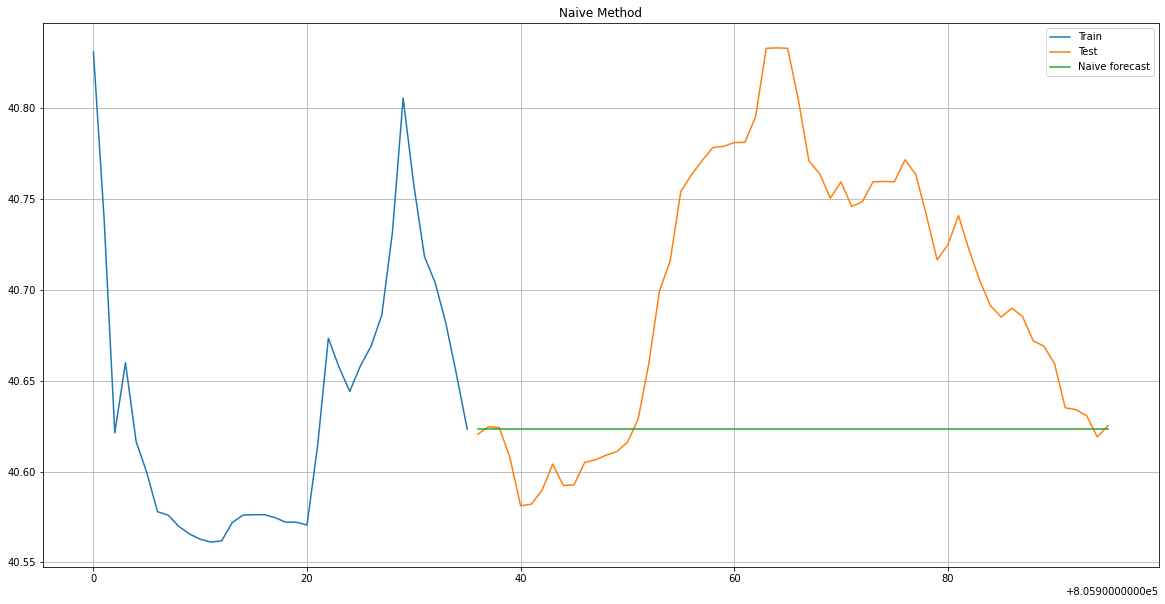

In [205]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(train_data['mean_bid'][805900:], label='Train')
plt.plot(test_data['mean_bid'], label='Test')
plt.plot(Naive_method_data['naive_forecast'], label='Naive forecast')
plt.title('Naive Method')
plt.legend()
plt.show()

Кросс валидация (MAE метрика)

In [129]:
from sklearn.metrics import mean_absolute_error
MAE_value = mean_absolute_error(test_data['mean_bid'], Naive_method_data['naive_forecast'])
print(MAE_value)


0.08430893337665661


Средняя модель

In [160]:
Mean_method_data = test_data.copy()
Mean_method_data['mean_forecast'] = np.mean(train_data['mean_bid'].tail(60))

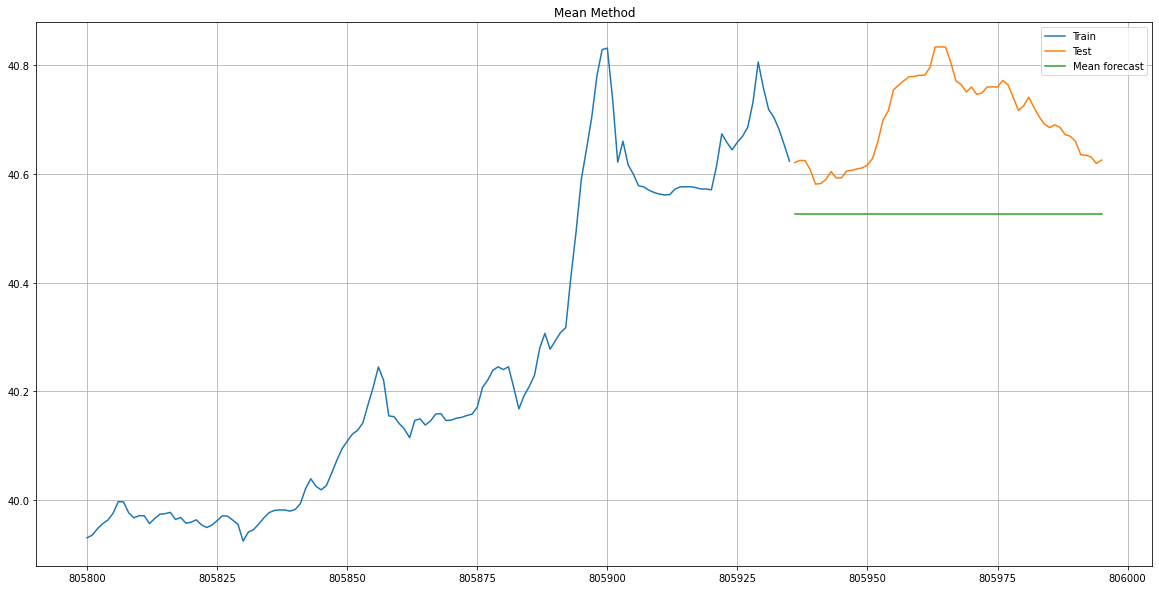

In [206]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(train_data['mean_bid'][805800:], label='Train')
plt.plot(test_data['mean_bid'], label='Test')
plt.plot(Mean_method_data['mean_forecast'], label='Mean forecast')
plt.title('Mean Method')
plt.legend()
plt.show()

In [162]:
MAE_value = mean_absolute_error(test_data['mean_bid'], Mean_method_data['mean_forecast'])
print(MAE_value)

0.17212936955709518


Сезонный метод

In [221]:
Seasonal_method_data = test_data.copy()
Season_period = 10

for i in range(len(test_data)):
    lag = i % Season_period
    Seasonal_method_data.at[length_of_train + i,'seasonal_forecast'] = train_data['mean_bid'][length_of_train - Season_period + lag]

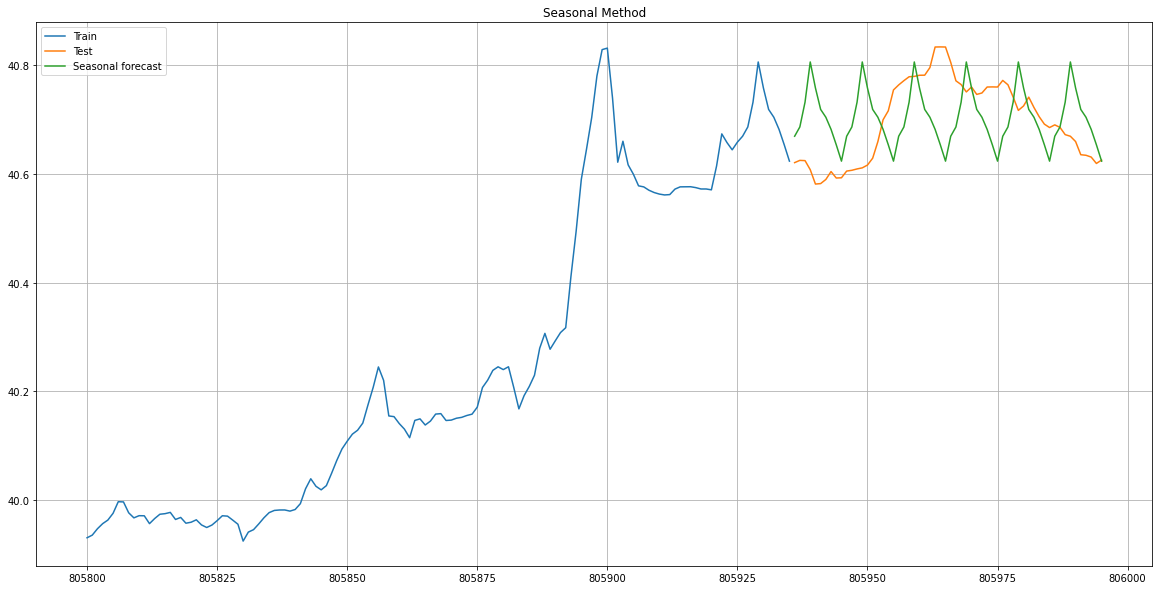

In [222]:
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(train_data['mean_bid'][805800:], label='Train')
plt.plot(test_data['mean_bid'], label='Test')
plt.plot(Seasonal_method_data['seasonal_forecast'], label='Seasonal forecast')
plt.title('Seasonal Method')
plt.legend()
plt.show()

In [223]:
MAE_value = mean_absolute_error(test_data['mean_bid'], Seasonal_method_data['seasonal_forecast'])
print(MAE_value)

0.07774769204847634


just a test

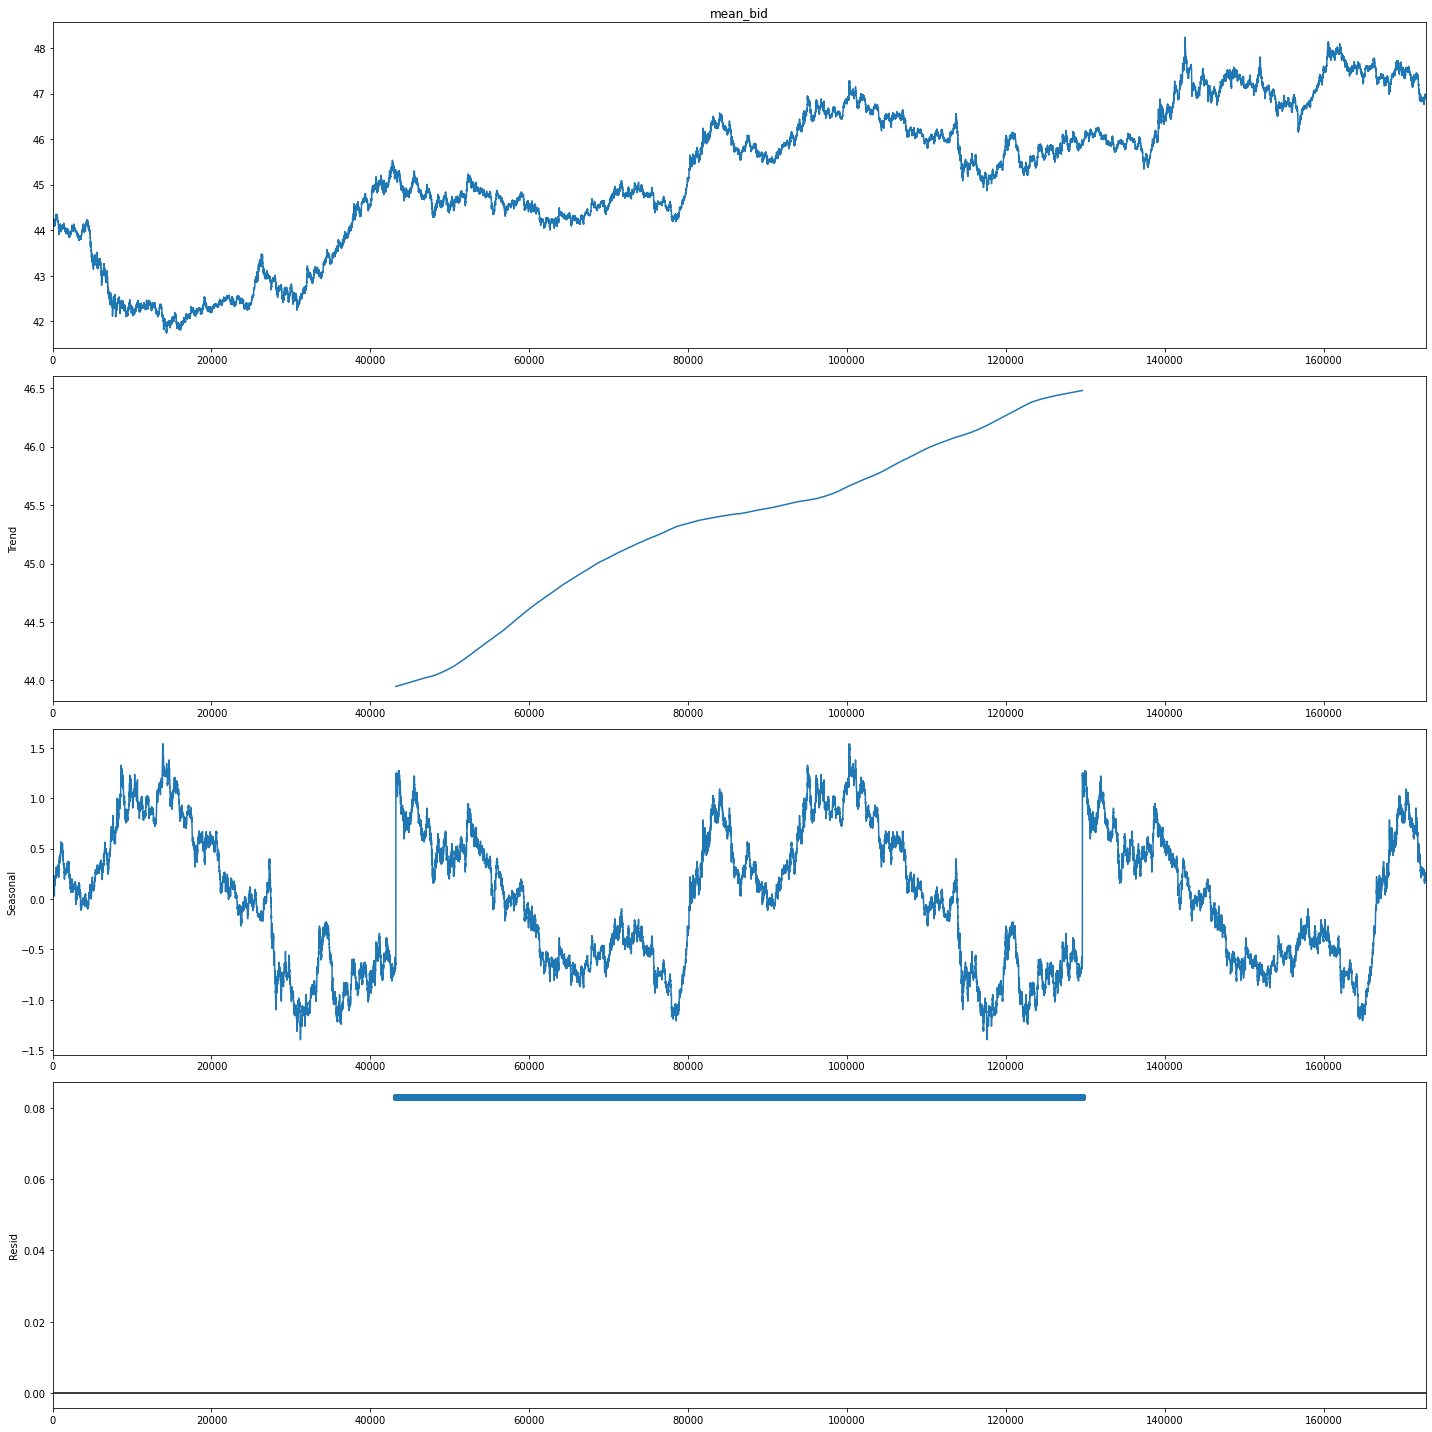

In [111]:
import statsmodels as sm
rcParams['figure.figsize'] = 20,20
fr = 60*60*24
decomposition = sm.tsa.seasonal.seasonal_decompose(train_data.mean_bid,
                                period = fr,
                                model='additive' ) # additive seasonal index
fig = decomposition.plot()
plt.show()